# Merge Files

In [18]:
years=[]
start=input("Enter start year: ")
end=input("Enter end year: ")
start = int(start)  
end = int(end)
for i in range(start,end+1):
    years.append(str(i))

Enter start year: 1971
Enter end year: 1990


In [19]:
import os


# Set the directory path and the list of prefixes to search for
directory = "/Users/shaistasyeda/Desktop/DataSet/TextFiles"
# prefixes = ["prefix1_", "prefix2_", "prefix3_"]

# Create a new file to store the merged contents
with open("merged_file_1990.txt", "w") as f:
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the filename starts with any of the prefixes
        if any(filename.startswith(prefix) for prefix in years):
            # Open the file and read the contents
            with open(os.path.join(directory, filename), "r") as file:
                contents = file.read()
                # Write the contents to the merged file
                f.write(contents)

## Tokenization of the Merged files

In [10]:
input_directory_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates'

In [21]:
import os
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [22]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [20]:
# Define a function to clean and tokenize a text file
def clean_and_tokenize_file(input_file_path, output_file_path):
    with open(input_file_path, 'r', encoding='utf-8') as input_file, open(output_file_path, 'w', encoding='utf-8') as output_file:
        for line in input_file:
            # Convert to lowercase
            line = line.lower()

            # Tokenize into words
            tokens = word_tokenize(line)

            # Remove punctuation and stopwords, and apply lemmatization
            cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]

            # Write the cleaned and tokenized line to the output file
            cleaned_line = ' '.join(cleaned_tokens)
            output_file.write(cleaned_line + '\n')

# Directory paths to merged files for different years
file_paths = {
    '1851_1900.txt': '/Users/shaistasyeda/Desktop/DataSet/Merged-Files/merged_file_1900.txt',
    '1901_1950.txt': '/Users/shaistasyeda/Desktop/DataSet/Merged-Files/merged_file_1950.txt',
    '1951_1970.txt': '/Users/shaistasyeda/Desktop/DataSet/Merged-Files/merged_file_1970.txt',
    '1971_1990.txt': '/Users/shaistasyeda/Desktop/DataSet/Merged-Files/merged_file_1990.txt',
    '1991_2006.txt': '/Users/shaistasyeda/Desktop/DataSet/Merged-Files/merged_file_2006.txt'
}

# Directory path to save the tokenized files
output_directory = 'tokenized_debates'

# Create the directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Process and tokenize each merged debate file
for label, input_file_path in file_paths.items():
    output_file_path = os.path.join(output_directory, label.replace('.txt', '_tokenized.txt'))
    clean_and_tokenize_file(input_file_path, output_file_path)

    print(f"Tokenized {label} and saved to {output_file_path}")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tokenized 1851_1900.txt and saved to tokenized_debates/1851_1900_tokenized.txt
Tokenized 1901_1950.txt and saved to tokenized_debates/1901_1950_tokenized.txt
Tokenized 1951_1970.txt and saved to tokenized_debates/1951_1970_tokenized.txt
Tokenized 1971_1990.txt and saved to tokenized_debates/1971_1990_tokenized.txt
Tokenized 1991_2006.txt and saved to tokenized_debates/1991_2006_tokenized.txt


# Basic Statistics

In [21]:
# Initialize counters
total_word_count = 0
total_sentence_count = 0
document_count = 0

# Loop through the tokenized files
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory, file_name), 'r', encoding='utf-8') as file:
            sentences = file.readlines()
            document_count += 1
            total_sentence_count += len(sentences)
            for sentence in sentences:
                words = word_tokenize(sentence)
                total_word_count += len(words)

# Calculate average word and sentence counts per document
avg_word_count_per_doc = total_word_count / document_count
avg_sentence_count_per_doc = total_sentence_count / document_count

print(f"Total Documents: {document_count}")
print(f"Total Sentences: {total_sentence_count}")
print(f"Total Words: {total_word_count}")
print(f"Average Word Count per Document: {avg_word_count_per_doc:.2f}")
print(f"Average Sentence Count per Document: {avg_sentence_count_per_doc:.2f}")

Total Documents: 6
Total Sentences: 4360935
Total Words: 306700162
Average Word Count per Document: 51116693.67
Average Sentence Count per Document: 726822.50


In [22]:
# Initialize a dictionary to store word counts for each time period
word_count_per_period = {}

# Function to count words in a list of sentences
def count_words(sentences):
    word_count = 0
    for sentence in sentences:
        word_count += len(sentence)
    return word_count

# Loop through the tokenized files
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory, file_name), 'r', encoding='utf-8') as file:
            sentences = [line.strip().split() for line in file.readlines()]
            word_count = count_words(sentences)
            time_period = file_name.replace('_tokenized.txt', '')
            word_count_per_period[time_period] = word_count

# Print word counts for each time period
for time_period, word_count in word_count_per_period.items():
    print(f'Time Period: {time_period}, Word Count: {word_count}')



Time Period: 1800_1850, Word Count: 31537273
Time Period: 1901_1950, Word Count: 56409547
Time Period: 1851_1900, Word Count: 52393589
Time Period: 1971_1990, Word Count: 73183811
Time Period: 1991_2006, Word Count: 49776407
Time Period: 1951_1970, Word Count: 43399535


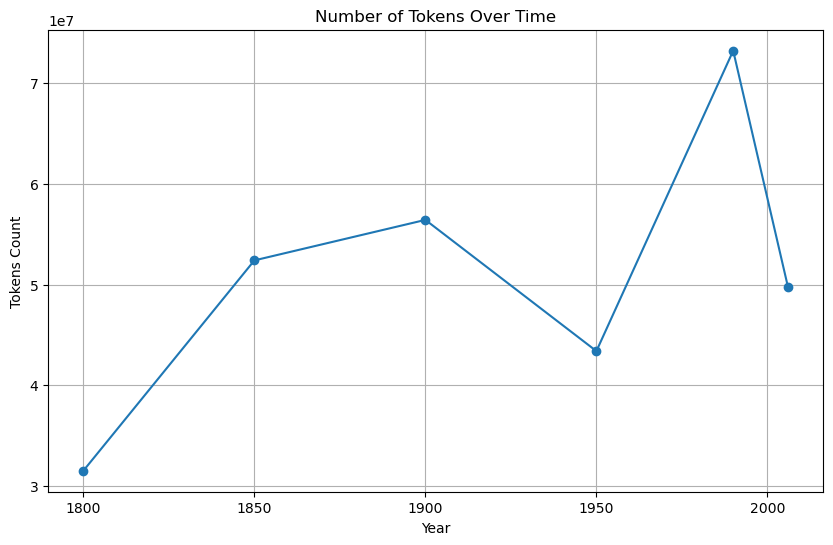

In [7]:
import matplotlib.pyplot as plt

years = [1800, 1850, 1900, 1950, 1990, 2006]
tokens_counts = [31537273, 52393589, 56409547, 43399535, 73183811, 49776407] 

plt.figure(figsize=(10, 6))
plt.plot(years, tokens_counts, marker='o', linestyle='-')
plt.title('Number of Tokens Over Time')
plt.xlabel('Year')
plt.ylabel('Tokens Count')
plt.grid(True)
plt.show()

# Keyword Analysis - Identify the occurance of few words 

In [1]:
pip install wordcloud

  Using cached wordcloud-1.9.2.tar.gz (222 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-311
      creating build/lib.macosx-11.1-arm64-cpython-311/wordcloud
      copying wordcloud/wordcloud_cli.py -> build/lib.macosx-11.1-arm64-cpython-311/wordcloud
      copying wordcloud/_version.py -> build/lib.macosx-11.1-arm64-cpython-311/wordcloud
      copying wordcloud/__init__.py -> build/lib.macosx-11.1-arm64-cpython-311/wordcloud
      copying wordcloud/tokenization.py -> build/lib.macosx-11.1-arm64-cpython-311/wordcloud
      copying wordcloud/wordcloud.py -> build/lib.macosx-11.1-arm64-cpython-311/wordcloud
      copying wordcloud/color_from_image.py -> build/lib.macosx-11.1-arm64-cpython-311/wordcloud
      c

In [2]:
pip install numpy pillow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
done
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
from nltk import FreqDist
import os

# Directory path where tokenized files are stored
tokenized_files_directory = 'tokenized_debates'

# Initialize a dictionary to store word frequencies for each file
word_freq_per_file = {}

# Iterate through the tokenized files in the directory
for filename in os.listdir(tokenized_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(tokenized_files_directory, filename)
        
        # Read the tokenized data from the file
        with open(file_path, 'r', encoding='utf-8') as file:
            tokenized_data = [line.strip().split() for line in file]

        # Initialize a FreqDist for the current file
        word_freq = FreqDist()
        
        # Calculate word frequencies for the current file
        flattened_tokens = [token for doc_tokens in tokenized_data for token in doc_tokens]
        word_freq.update(flattened_tokens)
        
        # Store the word frequencies for the current file
        word_freq_per_file[filename] = word_freq

# Get the most common words for each file
for filename, word_freq in word_freq_per_file.items():
    most_common_words = word_freq.most_common(10) 
    print(f"Most common words in {filename}: {most_common_words}")


Most common words in 1800_1850_tokenized.txt: [('would', 597000), ('house', 324164), ('hon', 322480), ('could', 237183), ('upon', 218121), ('country', 188412), ('member', 184050), ('lord', 182946), ('noble', 176239), ('one', 176011)]
Most common words in 1901_1950_tokenized.txt: [('hon', 630388), ('would', 546209), ('member', 417138), ('government', 371146), ('house', 363826), ('one', 329209), ('bill', 310502), ('whether', 309281), ('right', 308645), ('question', 282126)]
Most common words in 1851_1900_tokenized.txt: [('would', 919304), ('hon', 601719), ('house', 449041), ('member', 396241), ('government', 390248), ('bill', 374309), ('right', 313746), ('one', 309252), ('upon', 297922), ('gentleman', 290704)]
Most common words in 1971_1990_tokenized.txt: [('hon', 709024), ('state', 665457), ('secretary', 581156), ('government', 499876), ('would', 460508), ('member', 450904), ('year', 409888), ('friend', 377851), ('lord', 361964), ('right', 337498)]
Most common words in 1991_2006_tokeniz

In [3]:
import nltk
from nltk import FreqDist
import os

# Directory path where your tokenized .txt files are stored
tokenized_files_directory = 'tokenized_debates'

# Initialize a FreqDist to store word frequencies
word_freq = FreqDist()

# Iterate through the tokenized .txt files in the directory
for filename in os.listdir(tokenized_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(tokenized_files_directory, filename)
        
        # Read the tokenized data from the file
        with open(file_path, 'r', encoding='utf-8') as file:
            tokenized_data = [line.strip().split() for line in file]

        # Flatten the list of tokens and update word frequencies
        flattened_tokens = [token for doc_tokens in tokenized_data for token in doc_tokens]
        word_freq.update(flattened_tokens)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(10)  
print(most_common_words)


[('hon', 3154640), ('would', 3146208), ('government', 2064273), ('member', 2006418), ('house', 1744486), ('state', 1703251), ('right', 1580868), ('one', 1549606), ('year', 1511137), ('lord', 1378509)]


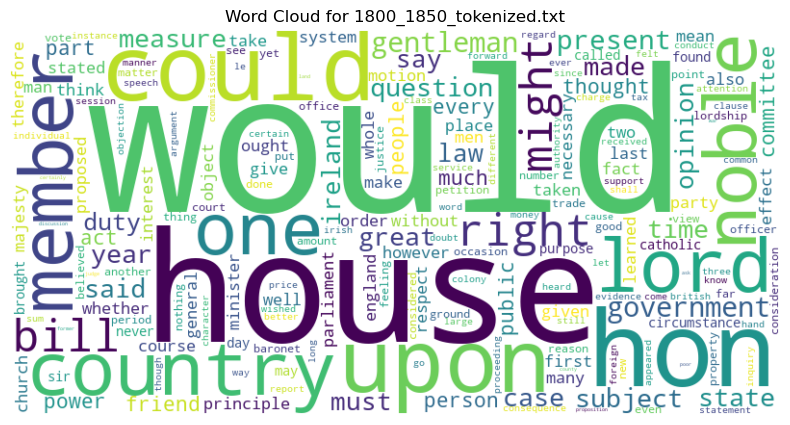

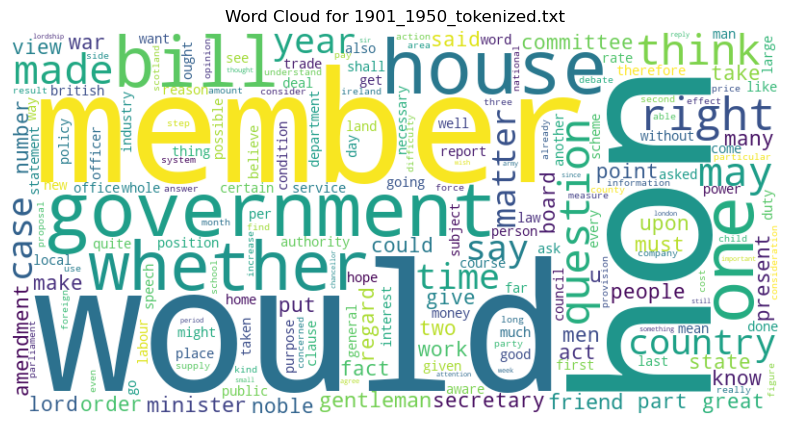

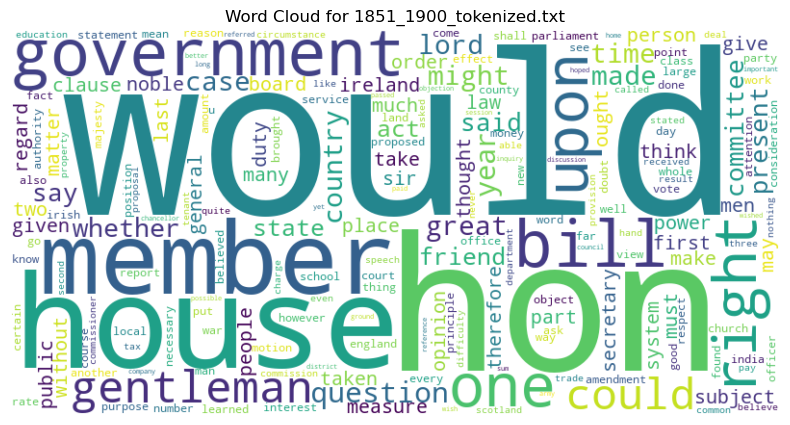

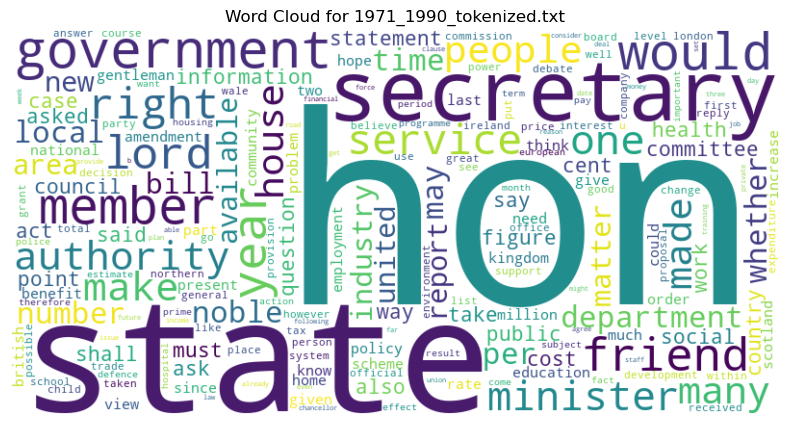

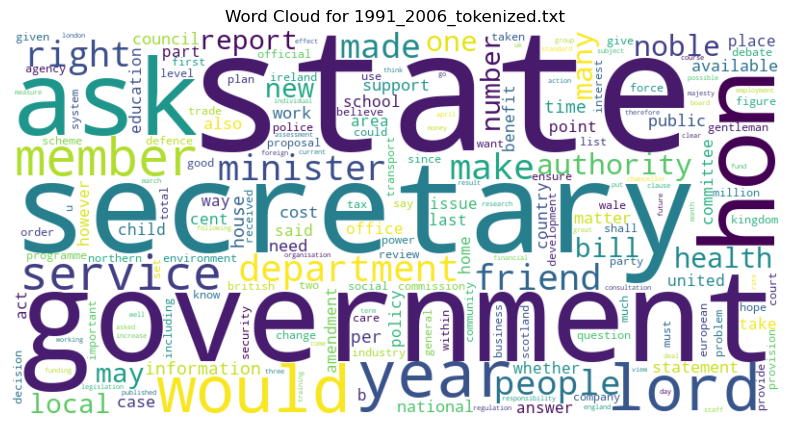

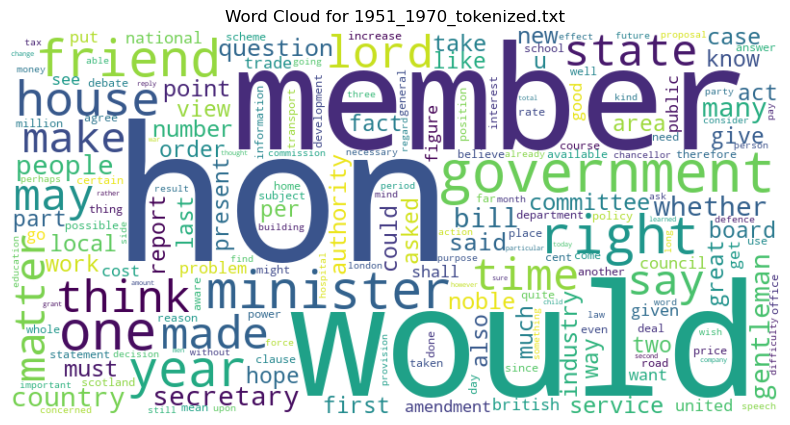

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Iterate through word frequencies for each file
for filename, word_freq in word_freq_per_file.items():
    # Extract the keywords and their frequencies
    most_common_words = word_freq.most_common(10)  
    keywords, frequencies = zip(*most_common_words)

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Display the word cloud with the filename as the title
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {filename}")
    plt.axis('off')
    plt.show()


In [8]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# File path to the tokenized .txt 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1901_1950_tokenized.txt'

# Initialize a list to store bigrams
bigrams = []

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    tokenized_data = [line.strip().split() for line in file]

# Extract bigrams from the tokenized data
bigrams.extend(nltk.bigrams([token.lower() for doc_tokens in tokenized_data for token in doc_tokens]))

# Create a BigramCollocationFinder
finder = BigramCollocationFinder.from_words(bigrams)

# Find bigrams based on their frequency
bigrams_associated = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10) 

print("Bigrams associated:", bigrams_associated)


Bigrams associated: [(('right', 'hon'), ('hon', 'gentleman')), (('right', 'hon'), ('hon', 'friend')), (('president', 'board'), ('board', 'trade')), (('hon', 'gallant'), ('gallant', 'member')), (('state', 'foreign'), ('foreign', 'affair')), (('secretary', 'state'), ('state', 'war')), (('hon', 'gallant'), ('gallant', 'friend')), (('hon', 'friend'), ('friend', 'member')), (('would', 'refer'), ('refer', 'hon')), (('local', 'government'), ('government', 'board'))]


In [6]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# File path to the tokenized .txt file
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1901_1950_tokenized.txt'

# Initialize a list to store bigrams
bigrams = []

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    tokenized_data = [line.strip().split() for line in file]

# Extract bigrams from the tokenized data
bigrams.extend(nltk.bigrams([token.lower() for doc_tokens in tokenized_data for token in doc_tokens]))

# Create a BigramCollocationFinder
finder = BigramCollocationFinder.from_words(bigrams)

# Define a word count threshold for filtering bigrams
word_count_threshold = 100  # Adjust this threshold as needed

# Filter bigrams that include 'woman' and meet the word count threshold
woman_bigrams = [bigram for bigram in finder.ngram_fd if 'woman' in bigram and finder.ngram_fd[bigram] >= word_count_threshold]

print("Bigrams related to 'woman' meeting the threshold:", woman_bigrams)

Bigrams related to 'woman' meeting the threshold: []


Keyword: woman
Time Period: 1800_1850, Count: 4292
Time Period: 1901_1950, Count: 42350
Time Period: 1851_1900, Count: 15524
Time Period: 1971_1990, Count: 38996
Time Period: 1991_2006, Count: 26686
Time Period: 1951_1970, Count: 17627


Keyword: gender
Time Period: 1800_1850, Count: 558
Time Period: 1901_1950, Count: 409
Time Period: 1851_1900, Count: 459
Time Period: 1971_1990, Count: 523
Time Period: 1991_2006, Count: 3368
Time Period: 1951_1970, Count: 248


Keyword: women
Time Period: 1800_1850, Count: 0
Time Period: 1901_1950, Count: 210
Time Period: 1851_1900, Count: 26
Time Period: 1971_1990, Count: 1165
Time Period: 1991_2006, Count: 688
Time Period: 1951_1970, Count: 425


Keyword: suffrage
Time Period: 1800_1850, Count: 1603
Time Period: 1901_1950, Count: 1198
Time Period: 1851_1900, Count: 3754
Time Period: 1971_1990, Count: 165
Time Period: 1991_2006, Count: 89
Time Period: 1951_1970, Count: 270


Keyword: equality
Time Period: 1800_1850, Count: 3094
Time Period: 1901_1950

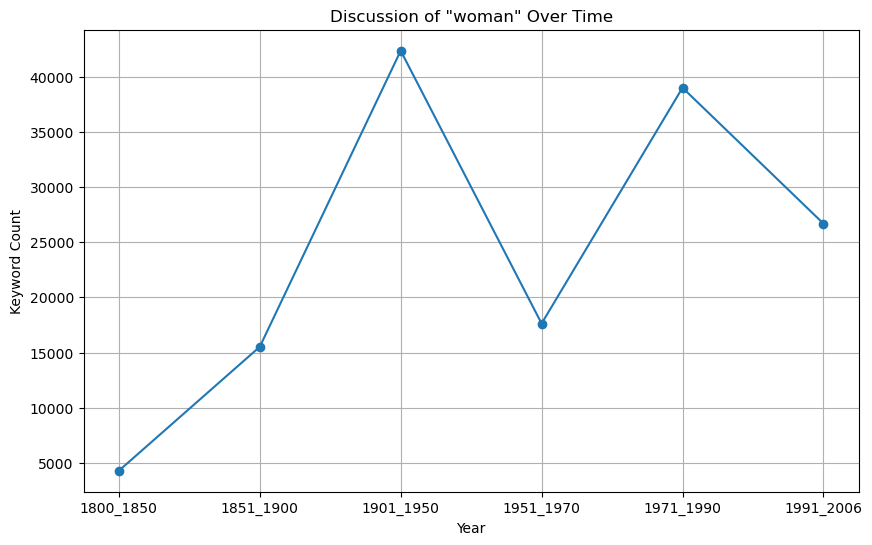

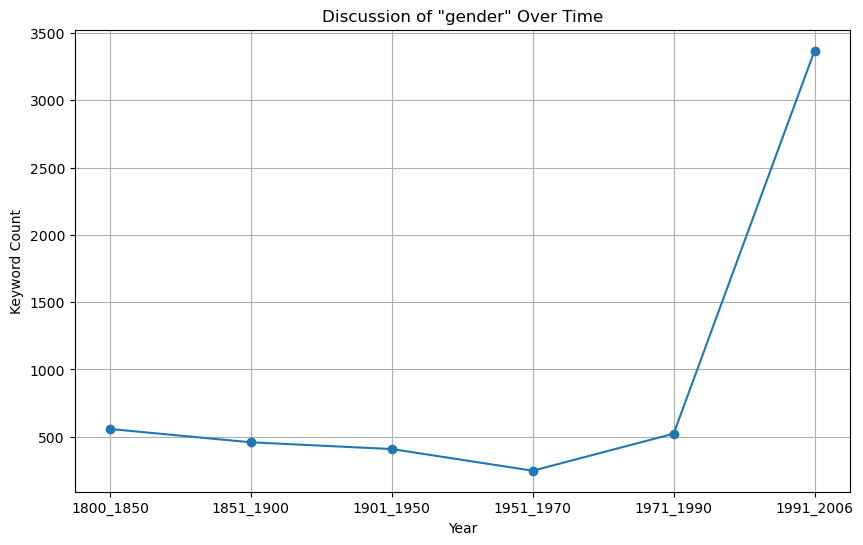

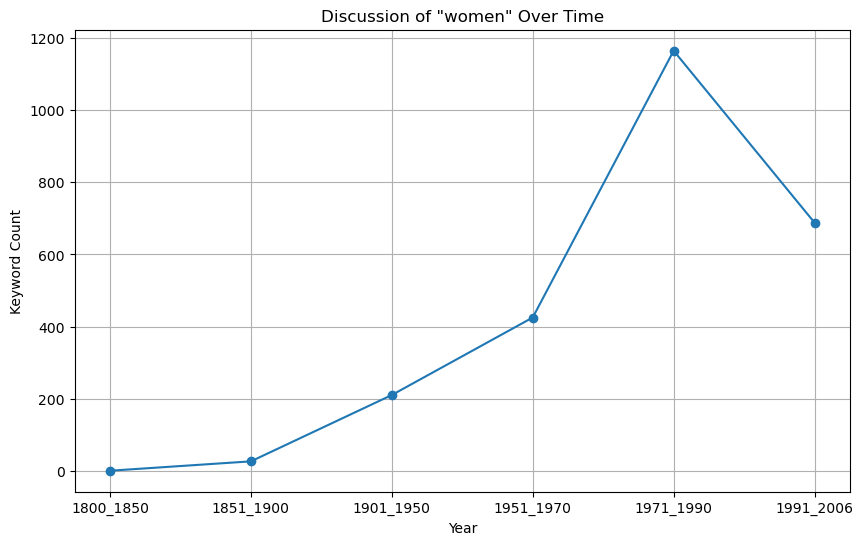

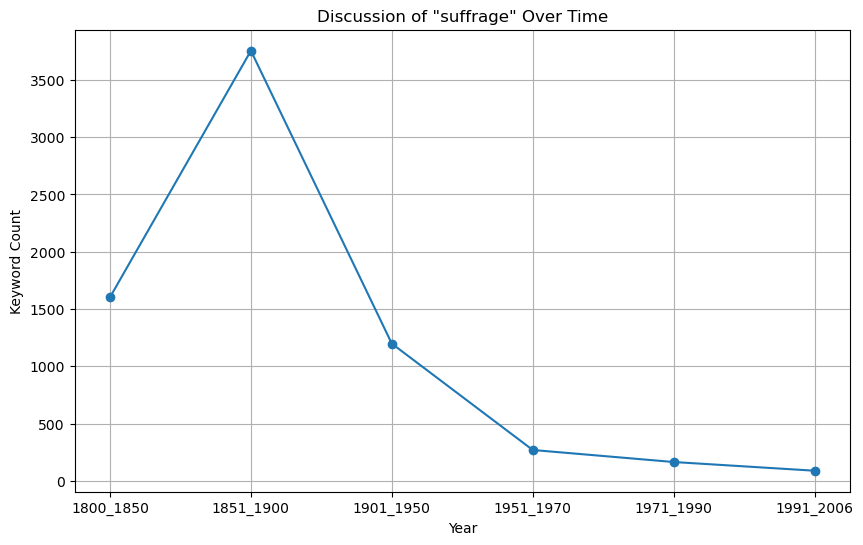

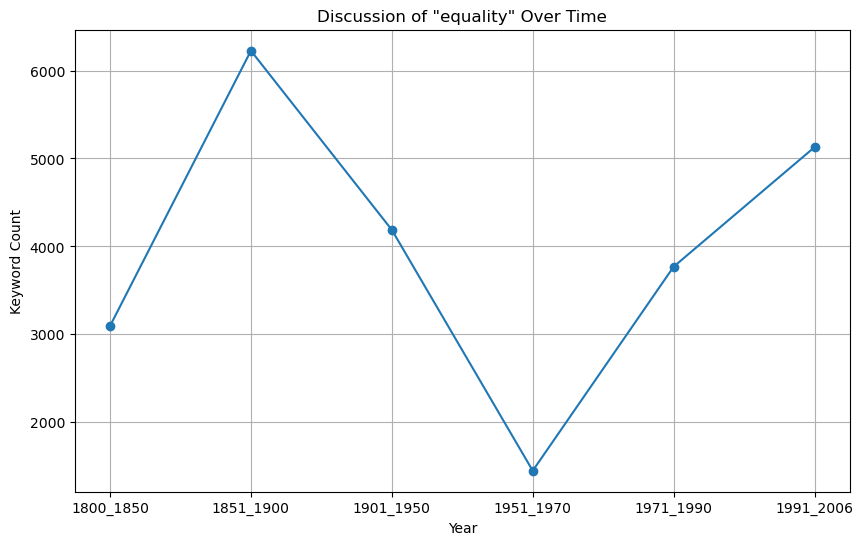

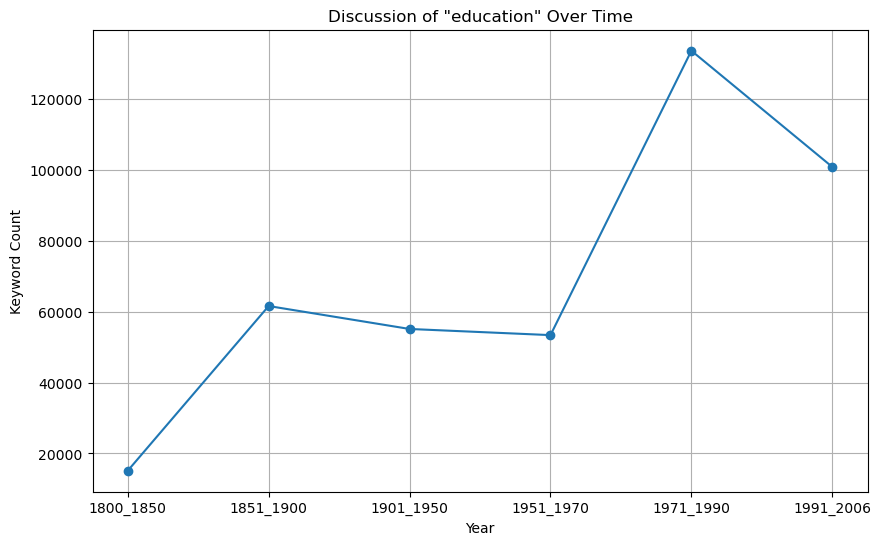

In [15]:
# Keywords related to women's topics
keywords = ['woman', 'gender', 'women', 'suffrage', 'equality', 'education']

# Initialize a dictionary to store keyword counts for each time period
keyword_counts_per_period = {keyword: {} for keyword in keywords}

# Function to count keywords in a list of sentences
def count_keywords(sentences, keyword):
    keyword_count = 0
    for sentence in sentences:
        keyword_count += sentence.count(keyword)
    return keyword_count

# Loop through the tokenized files
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory_path, file_name), 'r', encoding='utf-8') as file:
            sentences = [line.strip() for line in file.readlines()]
            time_period = file_name.replace('_tokenized.txt', '')

            for keyword in keywords:
                keyword_count = count_keywords(sentences, keyword)
                keyword_counts_per_period[keyword][time_period] = keyword_count

# Print keyword counts for each keyword and time period
for keyword, counts in keyword_counts_per_period.items():
    print(f'Keyword: {keyword}')
    for time_period, count in counts.items():
        print(f'Time Period: {time_period}, Count: {count}')
    print('\n')

# Create a separate line plot for each keyword
for keyword in keywords:
    counts_to_plot = keyword_counts_per_period[keyword]

    # Extract years and counts for the chosen keyword and sort them
    years = sorted(list(counts_to_plot.keys()))
    counts = [counts_to_plot[year] for year in years]

    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(years, counts, marker='o', linestyle='-')
    plt.title(f'Discussion of "{keyword}" Over Time')
    plt.xlabel('Year')
    plt.ylabel('Keyword Count')
    plt.grid(True)

    # Show the plot
    plt.show()

Keyword: childbirth
Time Period: 1800_1850, Count: 30
Time Period: 1901_1950, Count: 145
Time Period: 1851_1900, Count: 13
Time Period: 1971_1990, Count: 318
Time Period: 1991_2006, Count: 254
Time Period: 1951_1970, Count: 164


Keyword: homemaker
Time Period: 1800_1850, Count: 0
Time Period: 1901_1950, Count: 0
Time Period: 1851_1900, Count: 0
Time Period: 1971_1990, Count: 12
Time Period: 1991_2006, Count: 0
Time Period: 1951_1970, Count: 0


Keyword: wife
Time Period: 1800_1850, Count: 3429
Time Period: 1901_1950, Count: 16388
Time Period: 1851_1900, Count: 8301
Time Period: 1971_1990, Count: 15769
Time Period: 1991_2006, Count: 4966
Time Period: 1951_1970, Count: 9364




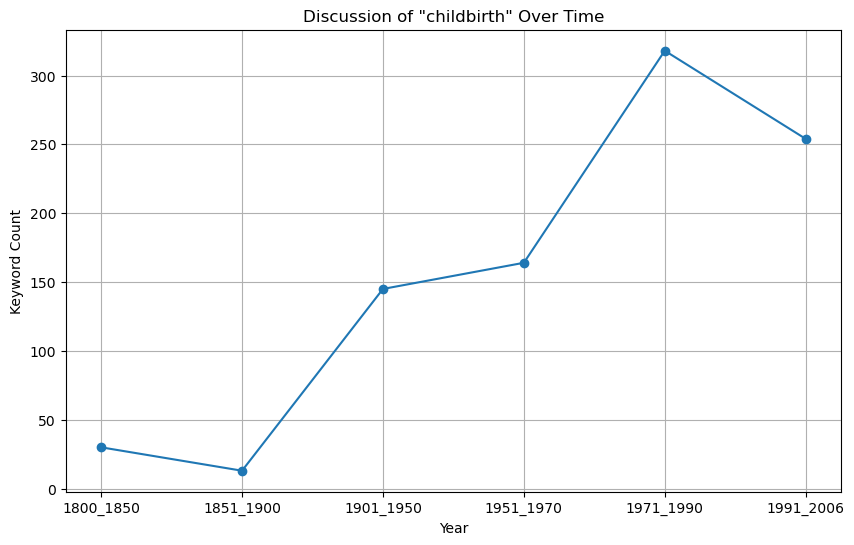

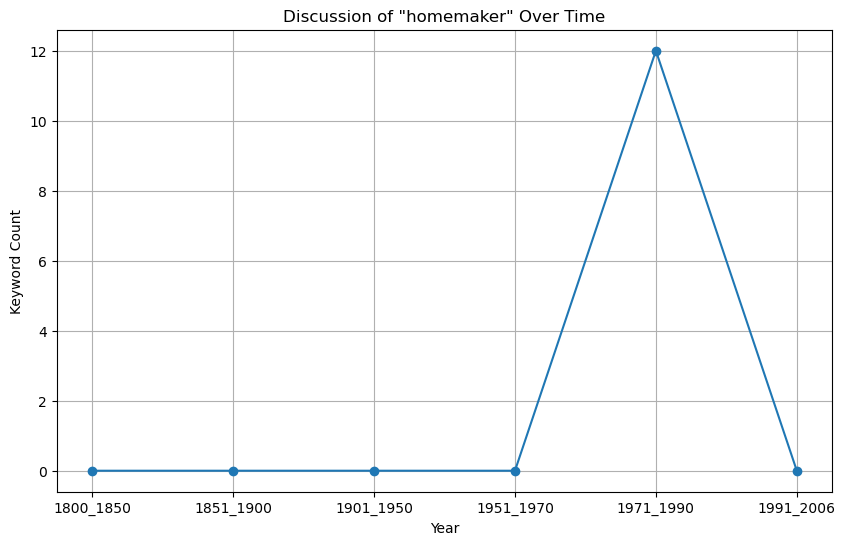

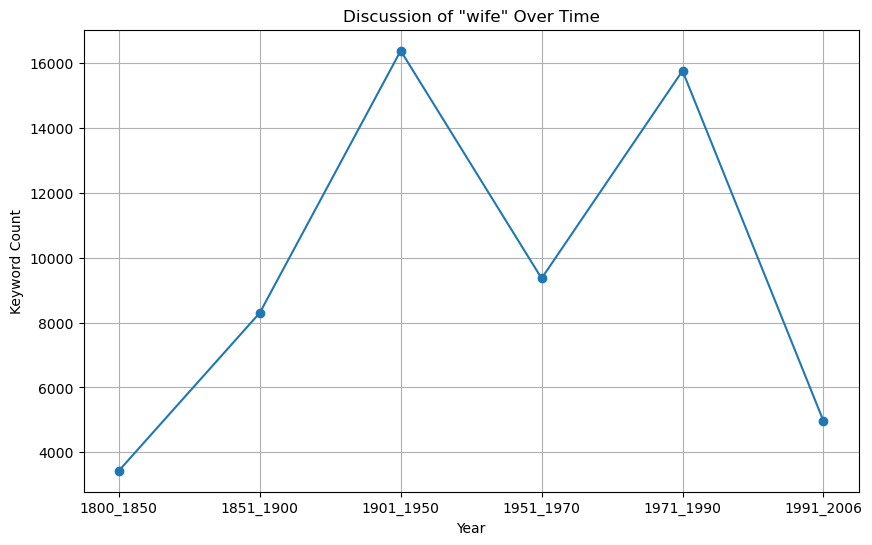

In [16]:
# Keywords related to women's topics
keywords = ['childbirth', 'homemaker', 'wife']

# Initialize a dictionary to store keyword counts for each time period
keyword_counts_per_period = {keyword: {} for keyword in keywords}

# Function to count keywords in a list of sentences
def count_keywords(sentences, keyword):
    keyword_count = 0
    for sentence in sentences:
        keyword_count += sentence.count(keyword)
    return keyword_count

# Loop through the tokenized files
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory_path, file_name), 'r', encoding='utf-8') as file:
            sentences = [line.strip() for line in file.readlines()]
            time_period = file_name.replace('_tokenized.txt', '')

            for keyword in keywords:
                keyword_count = count_keywords(sentences, keyword)
                keyword_counts_per_period[keyword][time_period] = keyword_count

# Print keyword counts for each keyword and time period
for keyword, counts in keyword_counts_per_period.items():
    print(f'Keyword: {keyword}')
    for time_period, count in counts.items():
        print(f'Time Period: {time_period}, Count: {count}')
    print('\n')

# Create a separate line plot for each keyword
for keyword in keywords:
    counts_to_plot = keyword_counts_per_period[keyword]

    # Extract years and counts for the chosen keyword and sort them
    years = sorted(list(counts_to_plot.keys()))
    counts = [counts_to_plot[year] for year in years]

    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(years, counts, marker='o', linestyle='-')
    plt.title(f'Discussion of "{keyword}" Over Time')
    plt.xlabel('Year')
    plt.ylabel('Keyword Count')
    plt.grid(True)

    # Show the plot
    plt.show()

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on a list of sentences
def perform_sentiment_analysis(sentences):
    sentiment_scores = []
    for sentence in sentences:
        sentiment_score = analyzer.polarity_scores(' '.join(sentence))
        sentiment_scores.append(sentiment_score)
    return sentiment_scores

# Loop through the tokenized files
for file_name in tqdm(os.listdir(input_directory_path)):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory_path, file_name), 'r', encoding='utf-8') as file:
            sentences = [line.strip().split() for line in file.readlines()]
            time_period = file_name.replace('_tokenized.txt', '')

            # Perform sentiment analysis on the sentences
            sentiment_scores = perform_sentiment_analysis(sentences)

            #Calculate and print the average sentiment score for this time period
            avg_sentiment_score = sum(sentiment['compound'] for sentiment in sentiment_scores) / len(sentiment_scores)
            print(f'Time Period: {time_period}, Average Sentiment Score: {avg_sentiment_score:.2f}')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
 29%|████████████▊                                | 2/7 [02:54<07:16, 87.32s/it]

Time Period: 1800_1850, Average Sentiment Score: 0.24


 43%|██████████████████▊                         | 3/7 [08:20<12:26, 186.54s/it]

Time Period: 1901_1950, Average Sentiment Score: 0.32


 57%|█████████████████████████▏                  | 4/7 [13:43<11:52, 237.66s/it]

Time Period: 1851_1900, Average Sentiment Score: 0.27


 71%|███████████████████████████████▍            | 5/7 [22:07<11:00, 330.37s/it]

Time Period: 1971_1990, Average Sentiment Score: 0.36


 86%|█████████████████████████████████████▋      | 6/7 [28:19<05:43, 343.88s/it]

Time Period: 1991_2006, Average Sentiment Score: 0.39


100%|████████████████████████████████████████████| 7/7 [32:31<00:00, 278.73s/it]

Time Period: 1951_1970, Average Sentiment Score: 0.36
